In [2]:
import pandas as pd
df = pd.read_csv('allteams-nice-NI.csv')
df

,id,puzzle-games,puzzle-rating,puzzle-rd,blitz-games,blitz-rating,blitz-rd,rapid-games,rapid-rating,rapid-rd,storm-runs,storm-score
0,vay_vision,2.0,1846.0,246.0,2087,1785,49,160,2041,67,NaN,NaN
1,ian_fidelino,326.0,2447.0,146.0,1282,2297,45,164,2332,55,1.0,35.0
2,bltsandwich64,228.0,1949.0,190.0,92,1439,59,62,1640,75,NaN,NaN
3,rchoi2010,NaN,NaN,NaN,2,1145,227,0,1500,500,NaN,NaN
4,furyempire,49.0,1425.0,80.0,4,1724,170,6,1568,145,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
205121,dustin1304,2243.0,1535.0,61.0,33,905,100,229,1320,46,30.0,20.0
205122,waschbaer231,270.0,2190.0,197.0,724,2321,87,60,2152,93,NaN,NaN
205123,jewelz83,77.0,2184.0,198.0,46,1693,85,2,1642,253,NaN,NaN
205124,klonkrieger,52.0,1743.0,87.0,2525,1971,45,8,1686,168,NaN,NaN


In [3]:
df_nona = df.dropna()
prune = df_nona[(df_nona['blitz-rd']<100)&(df_nona['puzzle-rd']<100)&
                        (df_nona['rapid-rd']<100)&(df_nona['storm-runs']>10)]
prune

,id,puzzle-games,puzzle-rating,puzzle-rd,blitz-games,blitz-rating,blitz-rd,rapid-games,rapid-rating,rapid-rd,storm-runs,storm-score
7,bumblezz,1007.0,1907.0,61.0,110,1254,45,419,1289,46,60.0,24.0
14,coymagician171,1804.0,1705.0,76.0,106,1199,46,392,1297,52,15.0,17.0
16,sohil_526,3289.0,1511.0,63.0,411,1090,48,533,1213,46,30.0,24.0
20,sadecedenedim,44.0,2206.0,90.0,27,1620,88,24,2103,86,30.0,39.0
32,windrose11,2790.0,1752.0,74.0,2523,1502,45,439,1585,47,99.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...
205093,leopold2003,698.0,2038.0,61.0,530,1687,45,201,1789,59,49.0,31.0
205094,masterion2,11209.0,2036.0,64.0,1386,1771,46,348,1927,53,140.0,46.0
205095,lordnyrob,3580.0,2391.0,63.0,531,1789,48,102,1823,52,617.0,45.0
205117,voechr,4553.0,2180.0,66.0,3567,1973,45,72,2115,66,141.0,51.0


In [4]:
prune.to_csv('chess.csv')

In [6]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [4]:
X1 = sm.tools.add_constant(prune[['puzzle-rating','storm-score','blitz-rating']])

series_bf = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)

series_bf

const            57.328460
puzzle-rating     2.396886
storm-score       3.292413
blitz-rating      4.123233
dtype: float64

In [5]:
X1 = sm.tools.add_constant(prune[['puzzle-rating','storm-score','rapid-rating']])

series_bf = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)

series_bf

const            60.516269
puzzle-rating     2.647870
storm-score       2.578646
rapid-rating      3.492572
dtype: float64

In [7]:
X = prune['puzzle-rating']
y = prune['rapid-rating']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           rapid-rating   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                 2.380e+04
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:59:32   Log-Likelihood:            -1.0377e+05
No. Observations:               15500   AIC:                         2.075e+05
Df Residuals:                   15498   BIC:                         2.076e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           125.7133     11.097     11.328      0.000     103.962     147.465
puzzle-rating     0.8341      0.005    154.277      0.000       0.823       0.845
==============================================================================
Omnibus:                      782.244   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1831.515
Skew:                          -0.314   Prob(JB):                         0.00
Kurtosis:                       4.563   Cond. No.                     1.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

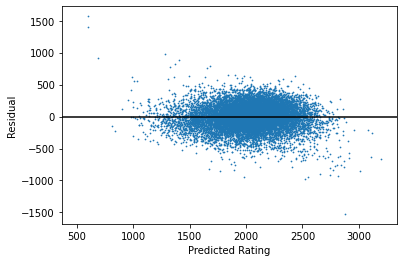

In [9]:
import matplotlib.pyplot as plt
plt.scatter(model.model.exog[:,1], model.resid,s=.5)
plt.xlabel("Predicted Rating")
plt.ylabel("Residual")
plt.axline((500, 0), (3000, 0),color="Black")

In [19]:
X = prune['puzzle-rating']
y = prune['blitz-rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X = sm.add_constant(X_train)

model = sm.OLS(y_train,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           blitz-rating   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                 1.668e+04
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:40:23   Log-Likelihood:                -85017.
No. Observations:               12400   AIC:                         1.700e+05
Df Residuals:                   12398   BIC:                         1.701e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -134.4671     14.602     -9.209      0.000    -163.089    -105.845
puzzle-rating     0.9193      0.007    129.139      0.000       0.905       0.933
==============================================================================
Omnibus:                      413.956   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              957.575
Skew:                          -0.181   Prob(JB):                    1.16e-208
Kurtosis:                       4.312   Cond. No.                     1.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

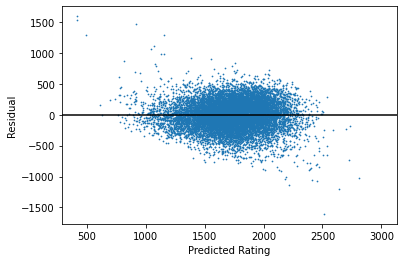

In [20]:
plt.scatter(model.predict(), model.resid,s=.5)
plt.xlabel("Predicted Rating")
plt.ylabel("Residual")
plt.axline((500, 0), (3000, 0),color="Black")

In [12]:
X = prune['storm-score']
y = prune['rapid-rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X = sm.add_constant(X_train)

model = sm.OLS(y_train,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           rapid-rating   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                 1.826e+04
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:28:51   Log-Likelihood:                -83163.
No. Observations:               12400   AIC:                         1.663e+05
Df Residuals:                   12398   BIC:                         1.663e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1090.4338      5.686    191.760      0.000    1079.287    1101.580
storm-score    19.1424      0.142    135.111      0.000      18.865      19.420
==============================================================================
Omnibus:                      375.110   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              543.967
Skew:                          -0.316   Prob(JB):                    7.57e-119
Kurtosis:                       3.808   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

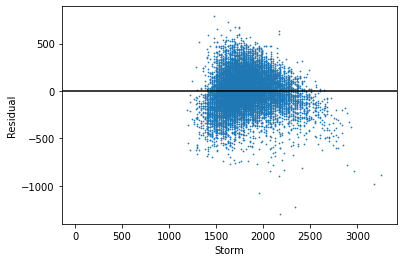

In [18]:
plt.scatter(model.predict(), model.resid,s=.5)
plt.xlabel("Storm")
plt.ylabel("Residual")
plt.axline((20, 0), (80, 0),color="Black")

In [64]:
X = prune['storm-score']
y = prune['blitz-rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X = sm.add_constant(X_train)

model = sm.OLS(y_train,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           blitz-rating   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                 3.187e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:10:34   Log-Likelihood:            -1.0278e+05
No. Observations:               15268   AIC:                         2.056e+05
Df Residuals:                   15266   BIC:                         2.056e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         868.1777      5.003    173.530      0.000     858.371     877.984
storm-score    23.0887      0.129    178.516      0.000      22.835      23.342
==============================================================================
Omnibus:                      186.859   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.471
Skew:                          -0.056   Prob(JB):                     2.11e-71
Kurtosis:                       3.706   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

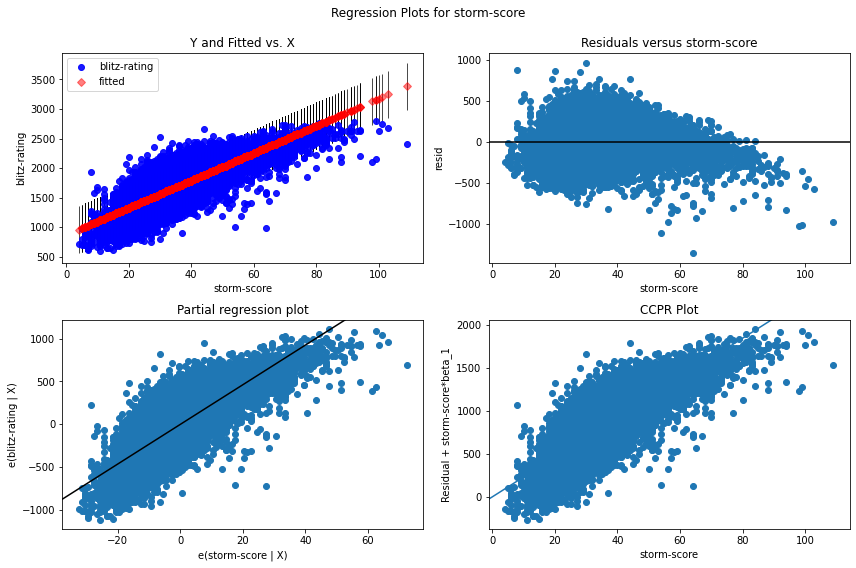

In [65]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'storm-score', fig=fig)

In [21]:
X = prune[['storm-score','puzzle-rating']]
y = prune['rapid-rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X = sm.add_constant(X_train)

model = sm.OLS(y_train,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           rapid-rating   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                 1.546e+04
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:42:04   Log-Likelihood:                -81019.
No. Observations:               12400   AIC:                         1.620e+05
Df Residuals:                   12397   BIC:                         1.621e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           367.2324     11.181     32.845      0.000     345.317     389.148
storm-score      11.1069      0.164     67.830      0.000      10.786      11.428
puzzle-rating     0.5070      0.007     71.565      0.000       0.493       0.521
==============================================================================
Omnibus:                      441.637   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              778.775
Skew:                          -0.298   Prob(JB):                    7.78e-170
Kurtosis:                       4.074   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

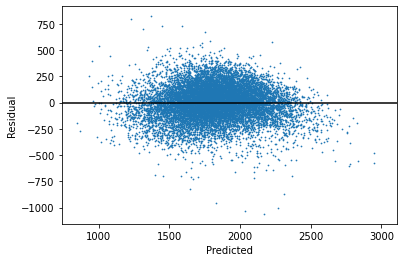

In [27]:
plt.scatter(model.predict(), model.resid,s=.5)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axline((1000, 0), (3000, 0),color="Black")

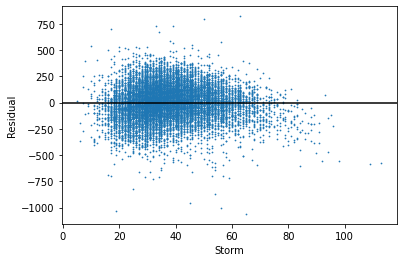

In [25]:
plt.scatter(model.model.exog[:,1], model.resid,s=.5)
plt.xlabel("Storm")
plt.ylabel("Residual")
plt.axline((20, 0), (80, 0),color="Black")

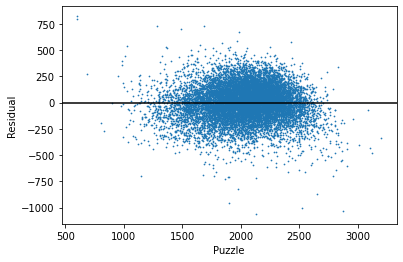

In [28]:
plt.scatter(model.model.exog[:,2], model.resid,s=.5)
plt.xlabel("Puzzle")
plt.ylabel("Residual")
plt.axline((1000, 0), (3000, 0),color="Black")

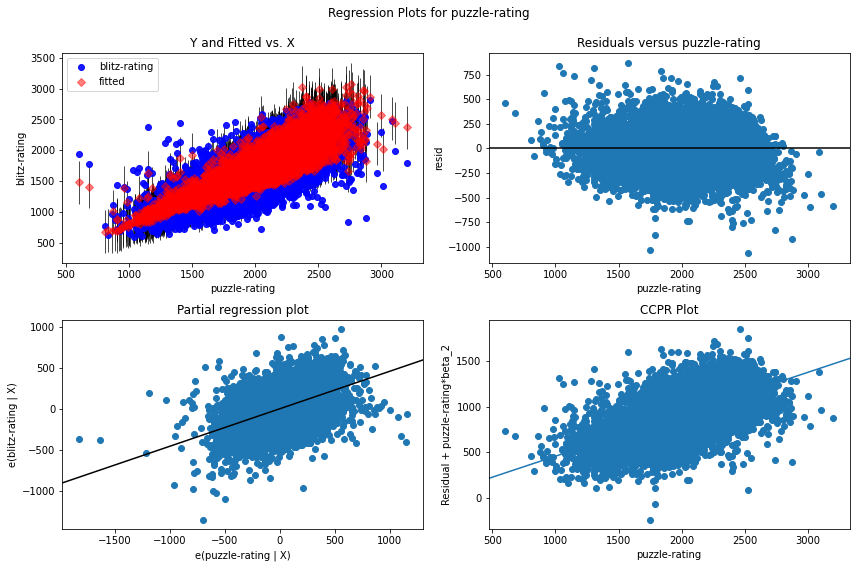

In [75]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'puzzle-rating', fig=fig)

In [69]:
X = prune[['storm-score','puzzle-rating']]
y = prune['blitz-rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X = sm.add_constant(X_train)

model = sm.OLS(y_train,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           blitz-rating   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                 2.318e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:14:11   Log-Likelihood:            -1.0073e+05
No. Observations:               15268   AIC:                         2.015e+05
Df Residuals:                   15265   BIC:                         2.015e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           213.3190     10.510     20.296      0.000     192.718     233.920
storm-score      15.8242      0.155    102.078      0.000      15.520      16.128
puzzle-rating     0.4576      0.007     68.526      0.000       0.445       0.471
==============================================================================
Omnibus:                      239.180   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.526
Skew:                          -0.103   Prob(JB):                     2.40e-93
Kurtosis:                       3.793   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

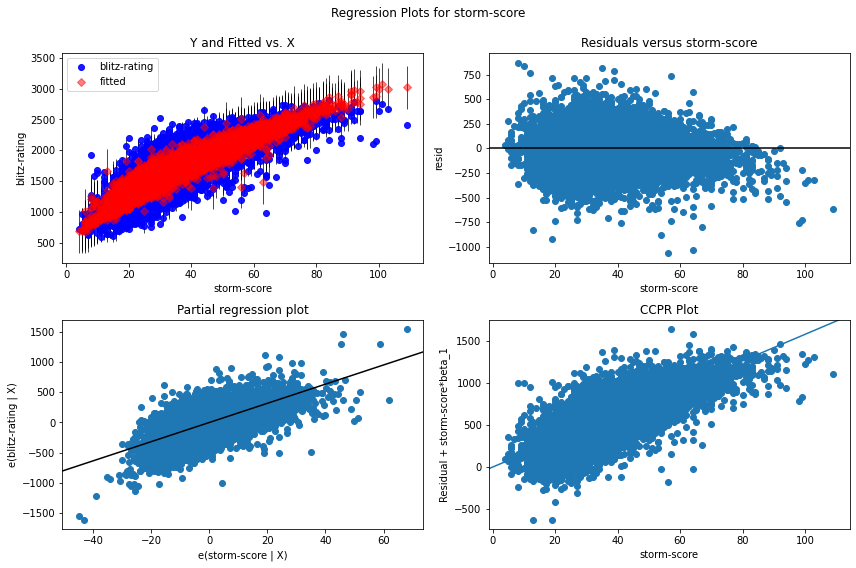

In [70]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'storm-score', fig=fig)

TypeError: 'str' object is not callable

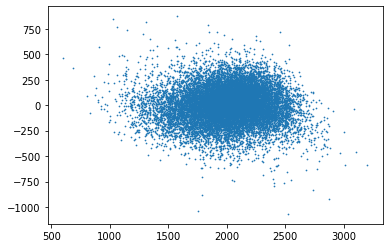

In [90]:
plt.scatter(model.model.exog[:,2], model.resid,s=.5)
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.axline((500, 0), (3000, 0),color="Black")


NameError: name 'reload' is not defined

In [29]:
import statsmodels.stats.diagnostic as diag
diag.het_breuschpagan(model.resid,model.model.exog)

(61.743231333968055,
 3.914061708448912e-14,
 30.990875685301738,
 3.6990026837089605e-14)

In [49]:
X = prune['blitz-rating']
y = prune['rapid-rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X = sm.add_constant(X_train)

model = sm.OLS(y_train,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           rapid-rating   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                 7.239e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:03:41   Log-Likelihood:                -96206.
No. Observations:               15268   AIC:                         1.924e+05
Df Residuals:                   15266   BIC:                         1.924e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          421.9363      5.237     80.567      0.000     411.671     432.202
blitz-rating     0.8058      0.003    269.045      0.000       0.800       0.812
==============================================================================
Omnibus:                     2667.002   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14062.675
Skew:                          -0.744   Prob(JB):                         0.00
Kurtosis:                       7.460   Cond. No.                     8.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""